<a href="https://colab.research.google.com/github/jatindangi1206/Financial-Analytics/blob/main/FAAI_session_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [22]:
df = pd.read_csv("Churn_Modelling_2.csv")
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,101348.88,1
1,608,41,1,83807.86,1,0,112542.58,0
2,502,42,8,159660.80,3,1,113931.57,1
3,699,39,1,0.00,2,0,93826.63,0
4,850,43,2,125510.82,1,1,79084.10,0


In [23]:
y=df["Exited"].values

In [24]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [25]:
x= df.iloc[:,:-1]

In [26]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary
0,619,42,2,0.00,1,1,101348.88
1,608,41,1,83807.86,1,0,112542.58
2,502,42,8,159660.80,3,1,113931.57
3,699,39,1,0.00,2,0,93826.63
4,850,43,2,125510.82,1,1,79084.10


In [27]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary
0,619,42,2,0.00,1,1,101348.88
1,608,41,1,83807.86,1,0,112542.58
2,502,42,8,159660.80,3,1,113931.57
3,699,39,1,0.00,2,0,93826.63
4,850,43,2,125510.82,1,1,79084.10
...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,96270.64
9996,516,35,10,57369.61,1,1,101699.77
9997,709,36,7,0.00,1,0,42085.58
9998,772,42,3,75075.31,2,1,92888.52


In [28]:
# spillting the data into the training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = 0)

In [29]:
from sklearn.preprocessing import StandardScaler
# pass on the function to a new variable
sc = StandardScaler()
# standardize the data
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [33]:
# Importing the Keras libraries and packages
import keras
# Sequential because the model has all layers in a sequence
from keras.models import Sequential
# Dense implies hidden layers which we cannot access from outside
# These are built in keras function
from keras.layers import Dense
# Initializing the Deep Learning Model
classifier = Sequential()
# Adding the input layer
# Input_dimensions = 7
# The first hidden layer has 6 units, weights are taken randomly from an uniform distribution and activation is the
classifier.add(Dense(units=4, kernel_initializer = 'uniform' , activation = 'relu' , input_dim = 7))
# Adding the second hidden layer
classifier.add(Dense(units=4, kernel_initializer = 'uniform' , activation = 'relu'))
# Adding the output  layer
# Here the activation function is Sigmoid as it is a binary classification problem
classifier.add(Dense(units=1, kernel_initializer = 'uniform' , activation = 'sigmoid'))
# Compiling the DNN
classifier.compile(optimizer='adam' , loss= 'binary_crossentropy' , metrics = ('accuracy'))
# Fitting the DNN to the training set
classifier.fit(x_train, y_train , batch_size = 10, epochs = 100)

Epoch 1/100
800/800 [==============================] - 4s 4ms/step - loss: 0.5173 - accuracy: 0.7950
Epoch 2/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4456 - accuracy: 0.7960
Epoch 3/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4443 - accuracy: 0.7960
Epoch 4/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4438 - accuracy: 0.7960
Epoch 5/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4433 - accuracy: 0.7960
Epoch 6/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4433 - accuracy: 0.7960
Epoch 7/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4433 - accuracy: 0.7960
Epoch 8/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4433 - accuracy: 0.7960
Epoch 9/100
800/800 [==============================] - 3s 3ms/step - loss: 0.4432 - accuracy: 0.7960
Epoch 10/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4432 - accura

63/63 [==============================] - 0s 3ms/step
Accuracy: 0.7975


<Axes: >

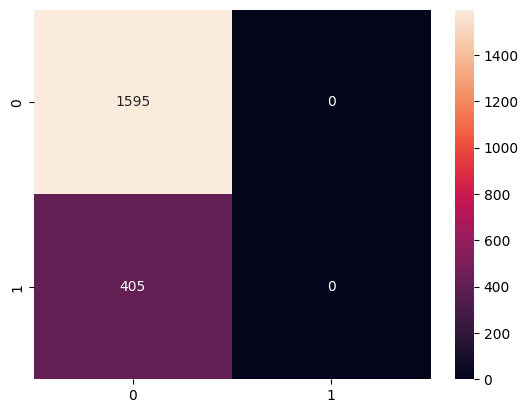

In [35]:
import seaborn as sns
from sklearn import metrics
# Predicting the Test set results
# Send the test data through the trained model
# Get the probability of prediction
# Determine if the value is less than or more than the cut off value
y_pred = classifier.predict(x_test)
# Model Accuracy, how often is the classifier correct?
# Here I have chosen 0.5 as the cut-off value
# If it is more than 0.5 then I have assigned it 1 otherwise 0
# y_test has the actual class information which we will compare the predicted class information
y_pred = (y_pred > 0.65)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt='')


# check accuracy to

In [38]:
#Computation of accuracy directly

from sklearn import metrics
y_pred = classifier.predict(x_test)
i = [0.05, 0.1,0.15,0.2, 0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
accuracy = []

for cutoff in i:
  y_pred = (classifier.predict(x_test) > cutoff)
  accuracy.append(metrics.accuracy_score(y_test,y_pred))

63/63 [==============================] - 0s 2ms/step


In [40]:
accuracy

[0.2915,
 0.462,
 0.602,
 0.685,
 0.742,
 0.7695,
 0.786,
 0.787,
 0.783,
 0.7975,
 0.7975,
 0.7975,
 0.7975,
 0.7975,
 0.7975,
 0.7975,
 0.7975,
 0.7975,
 0.7975]